## ЛР 1. Модель на основе данных акселератора

## Исследование данных

In [4]:
import pandas
import folium

data = pandas.read_csv("1_w.csv", sep=';', encoding='cp1251')

#print(data.head(3))

data['xy'] = data.apply(lambda x: [x['Широта'], x['Долгота']], axis = 1)

#print(data.head(3))

m = folium.Map(data.loc[0,'xy'], zoom_start=13)

route = folium.PolyLine(list(data['xy']), вес = 3, color = 'green', непрозрачность = 0.8).add_to(m)

# for i in ind:
    # if '30' in data.loc[i, 'point']:
        # folium.CircleMarker(location=data.loc[i, 'xy'], radius=2, popup=str(i)+"_"+str(data))

display(m)

## Объединяем данные в единый датасет

In [5]:
import pandas as pd
import os
import glob

def merge_csv_files_basic(folder_path, output_file='merged_data.csv'):

    # Находим все CSV файлы в папке
    csv_files = glob.glob(os.path.join(folder_path, '*.csv'))
    
    if not csv_files:
        print("CSV файлы не найдены!")
        return None
    
    print(f"Найдено {len(csv_files)} CSV файлов")
    
    # Читаем и объединяем все файлы
    dataframes = []
    for file in csv_files:
        try:
            df = pd.read_csv(file, sep=';', encoding='cp1251')
            df['source_file'] = os.path.basename(file)  # Добавляем имя файла
            dataframes.append(df)
            print(f"Обработан: {file} - {len(df)} строк")
        except Exception as e:
            print(f"Ошибка при чтении {file}: {e}")
    
    # Объединяем все DataFrame
    merged_df = pd.concat(dataframes, ignore_index=True)
    
    # Сохраняем результат
    merged_df.to_csv(output_file, index=False)
    print(f"Объединенный файл сохранен как: {output_file}")
    print(f"Итоговый размер: {len(merged_df)} строк, {len(merged_df.columns)} столбцов")
    
    return merged_df

df = merge_csv_files_basic('route/', output_file='full_dataset.csv')

Найдено 105 CSV файлов
Обработан: route\100_w.csv - 750 строк
Обработан: route\101_w.csv - 758 строк
Обработан: route\102_w.csv - 680 строк
Обработан: route\103_w.csv - 742 строк
Обработан: route\104_w.csv - 649 строк
Обработан: route\105_w.csv - 672 строк
Обработан: route\10_w.csv - 700 строк
Обработан: route\11_w.csv - 638 строк
Обработан: route\12_w.csv - 252 строк
Обработан: route\13_w.csv - 288 строк
Обработан: route\14_w.csv - 702 строк
Обработан: route\15_w.csv - 697 строк
Обработан: route\16_w.csv - 657 строк
Обработан: route\17_w.csv - 619 строк
Обработан: route\18_w.csv - 544 строк
Обработан: route\19_w.csv - 655 строк
Обработан: route\1_w.csv - 675 строк
Обработан: route\20_w.csv - 702 строк
Обработан: route\21_w.csv - 685 строк
Обработан: route\22_w.csv - 674 строк
Обработан: route\23_w.csv - 661 строк
Обработан: route\24_w.csv - 666 строк
Обработан: route\25_w.csv - 649 строк
Обработан: route\26_w.csv - 637 строк
Обработан: route\27_w.csv - 674 строк
Обработан: route\28_w.

## Распределение целевой переменной

In [6]:
import pandas as pd
import numpy as np

def split_dataset_basic(merged_df, target_column):
    
    print("=== ОПИСАНИЕ ДАННЫХ ===")

    # Отделяем признаки и целевую переменную
    X = merged_df.drop(columns=[target_column])
    y = merged_df[target_column]
    
    print(f"Размер всего датасета: {len(merged_df)} строк")
    print(f"Количество признаков: {X.shape[1]}")
    print(f"Целевая переменная: {target_column}")
    print(f"Уникальные значения целевой переменной: {y.nunique()}")
    print(f"Распределение целевой переменной:\n{y.value_counts()}")


print("=== ВЫДЕЛЕНИЕ В ДАТАСЕТЕ ДАННЫХ АКСЕЛЕРОМЕТРА И КАТЕГОРИИ ЯМЫ ===")

important_columns = ['len', 'Ускорение по оси X', 'Ускорение по оси Y', 'Ускорение по оси Z', 'point']
selected_df = df[important_columns].copy()

split_dataset_basic(selected_df, target_column='point')

=== ВЫДЕЛЕНИЕ В ДАТАСЕТЕ ДАННЫХ АКСЕЛЕРОМЕТРА И КАТЕГОРИИ ЯМЫ ===
=== ОПИСАНИЕ ДАННЫХ ===
Размер всего датасета: 70023 строк
Количество признаков: 4
Целевая переменная: point
Уникальные значения целевой переменной: 5
Распределение целевой переменной:
point
-             52441
point_60%      8835
point_30%      7656
point_90%      1030
point_120%       61
Name: count, dtype: int64


In [7]:
selected_df.describe()

len  Ускорение по оси X  Ускорение по оси Y  \
count  70023.000000        70023.000000        70023.000000   
mean    1806.138954            0.078103            1.026419   
std     1219.772583            0.062302            0.053524   
min        0.000000           -0.438965            0.456543   
25%      746.000000            0.038330            0.995117   
50%     1673.000000            0.081787            1.025757   
75%     2762.000000            0.121704            1.056396   
max     4231.000000            0.728271            1.494629   

       Ускорение по оси Z  
count        70023.000000  
mean             0.088297  
std              0.105337  
min             -1.252686  
25%              0.026978  
50%              0.089722  
75%              0.150452  
max              1.056152

## График данных акселератора

In [8]:
import plotly.graph_objects as go 

from plotly.subplots import make_subplots

fig = make_subplots(specs=[[{'secondary_y': True}]])

fig.add_trace (go.Scatter(x=selected_df['len'], y=selected_df['Ускорение по оси X'], mode='lines', name='Ускорение по оси X'), secondary_y=False)
fig.add_trace (go.Scatter(x=selected_df['len'], y=selected_df['Ускорение по оси Y'], mode='lines', name='Ускорение по оси Y'), secondary_y=False)
fig.add_trace (go.Scatter(x=selected_df['len'], y=selected_df['Ускорение по оси Z'], mode='lines', name='Ускорение по оси Z'), secondary_y=False)


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'mode': 'lines',
              'name': 'Ускорение по оси X',
              'type': 'scatter',
              'x': {'bdata': ('AAAAAAAAAAAAAAAAAADwPwAAAAAAAA' ... 'AAAAB8rkAAAAAAAH6uQAAAAAAAgK5A'),
                    'dtype': 'f8'},
              'xaxis': 'x',
              'y': {'bdata': ('AAAAAAAAjz8AAAAAADC2PwAAAAAAcL' ... 'AAAABwqT8AAAAAANi0PwAAAAAAlsU/'),
                    'dtype': 'f8'},
              'yaxis': 'y'},
             {'mode': 'lines',
              'name': 'Ускорение по оси Y',
              'type': 'scatter',
              'x': {'bdata': ('AAAAAAAAAAAAAAAAAADwPwAAAAAAAA' ... 'AAAAB8rkAAAAAAAH6uQAAAAAAAgK5A'),
                    'dtype': 'f8'},
              'xaxis': 'x',
              'y': {'bdata': ('AAAAAAA68D8AAAAAAMPwPwAAAACAcv' ... 'AAAICQ8D8AAAAAgBzxPwAAAABAo/A/'),
                    'dtype': 'f8'},
              'yaxis': 'y'},
             {'mode': 'lines',
              'name': 'Ускорение по оси Z',
              'type': 'scatter',
              'x': {'bdata': ('AAAAAAAAAAAAAAAAAADwPwAAAAAAAA' ... 'AAAAB8rkAAAAAAAH6uQAAAAAAAgK5A'),
                    'dtype': 'f8'},
              'xaxis': 'x',
              'y': {'bdata': ('AAAAAAD4sz8AAAAAAMjFPwAAAAAAUL' ... 'AAAABosD8AAAAAAKzEPwAAAAAAVL4/'),
                    'dtype': 'f8'},
              'yaxis': 'y'}],
    'layout': {'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 0.94]},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0]},
               'yaxis2': {'anchor': 'x', 'overlaying': 'y', 'side': 'right'}}
})

## Обучение модели, сравнение разных моделей, графики распределения 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

def train_best_model(X, y):
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Инициализируем модель
    # model = RandomForestClassifier(  
    #     random_state=42,  
    #     class_weight='balanced', 
    #     max_depth = None, 
    #     max_features = 'sqrt', 
    #     min_samples_leaf = 1, 
    #     min_samples_split = 2, 
    #     n_estimators = 200
    # )
    model = GradientBoostingClassifier(random_state=42)
    
    print("\n=== ОБУЧЕНИЕ МОДЕЛИ ===")
    model.fit(X_train, y_train)
    
    # Оценка модели
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    
    print(f"Точность на тренировочных данных: {train_score:.4f}")
    print(f"Точность на тестовых данных: {test_score:.4f}")
    
    # Кросс-валидация
    cv_scores = cross_val_score(model, X, y, cv=5)
    print(f"Кросс-валидация (5-fold): {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
    
    # Детальная оценка
    y_pred = model.predict(X_test)
    print("\n=== ДЕТАЛЬНЫЙ ОТЧЕТ ===")
    print(classification_report(y_test, y_pred))
    
    # Важность признаков
    print("=== ВАЖНОСТЬ ПРИЗНАКОВ ===")
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print(feature_importance)
    
    return model

def compare_models(X, y):
    """
    Сравнение нескольких моделей
    """
    from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
    from sklearn.svm import SVC
    from sklearn.linear_model import LogisticRegression
    from sklearn.preprocessing import StandardScaler
    from sklearn.pipeline import Pipeline

    # Balanced Random Forest
    brf = BalancedRandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        random_state=42,
        sampling_strategy='auto',
        n_jobs=-1
    )
    
    # Easy Ensemble
    ee = EasyEnsembleClassifier(
        n_estimators=10,
        random_state=42,
        sampling_strategy='auto'
    )

    models = {
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'Gradient Boosting': GradientBoostingClassifier(random_state=42),
        'Logistic Regression': Pipeline([
            ('scaler', StandardScaler()),
            ('lr', LogisticRegression(random_state=42, max_iter=1000))
        ]),
        'Balanced Random Forest': brf,
        'Easy Ensemble': ee
    }
    
    results = {}
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        score = model.score(X_test, y_test)
        results[name] = score
        print(f"{name}: {score:.4f}")
    
    return results

def plot_class_distribution(y):
    """Визуализация распределения классов"""
    plt.figure(figsize=(10, 6))
    class_counts = y.value_counts()
    colors = ["#ff00d0", "#0080ff", "#00ff00", "#ff0000", "#ffea00"]
    
    plt.subplot(1, 2, 1)
    bars = plt.bar(class_counts.index.astype(str), class_counts.values, color=colors[:len(class_counts)])
    plt.title('Распределение классов')
    plt.xlabel('Класс')
    plt.ylabel('Количество образцов')
    
    # Добавляем значения на столбцы
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                f'{int(height)}', ha='center', va='bottom')
    
    plt.subplot(1, 2, 2)
    plt.pie(class_counts.values, labels=class_counts.index.astype(str), 
            autopct='%1.1f%%', colors=colors[:len(class_counts)])
    plt.title('Процентное распределение классов')
    
    plt.tight_layout()
    plt.show()
    
    print("Статистика по классам:")
    for cls, count in class_counts.items():
        print(f"Класс {cls}: {count} samples ({(count/len(y)*100):.1f}%)")

def plot_pairplot(X, y, sample_size=1000):
    """Pairplot для визуализации разделения классов в пространстве признаков"""
    if len(X) > sample_size:
        # Берем выборку для ускорения визуализации
        indices = np.random.choice(len(X), sample_size, replace=False)
        X_sample = X.iloc[indices]
        y_sample = y.iloc[indices]
    else:
        X_sample = X
        y_sample = y
    
    plot_df = X_sample.copy()
    plot_df['class'] = y_sample.astype(str)

    sns.pairplot(plot_df, hue='class', palette='viridis', plot_kws={'alpha': 0.6})
    plt.suptitle('Pairplot: Визуализация разделения классов по признакам', y=1.02)
    plt.show()

important_columns = ['Ускорение по оси X', 'Ускорение по оси Y', 'Ускорение по оси Z']
X = selected_df[important_columns].copy()
y = selected_df['point'].copy()

## Настройка гиперпараметров

Рандомный лес показывал переобучение, пыталась подобрать лучшие параметры, но переобучение осталось.

In [29]:
from sklearn.model_selection import GridSearchCV

def optimize_hyperparameters(X, y):
    """Автоматический подбор лучших параметров"""
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [5, 10, 15, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2', None]
    }
    
    rf = RandomForestClassifier(class_weight='balanced', random_state=42)
    grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
    grid_search.fit(X, y)
    
    print("Лучшие параметры:", grid_search.best_params_)
    print("Лучшая точность:", grid_search.best_score_)
    
    return grid_search.best_estimator_

# Использование
best_model = optimize_hyperparameters(X, y)

Лучшие параметры: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Лучшая точность: 0.7366150773874879


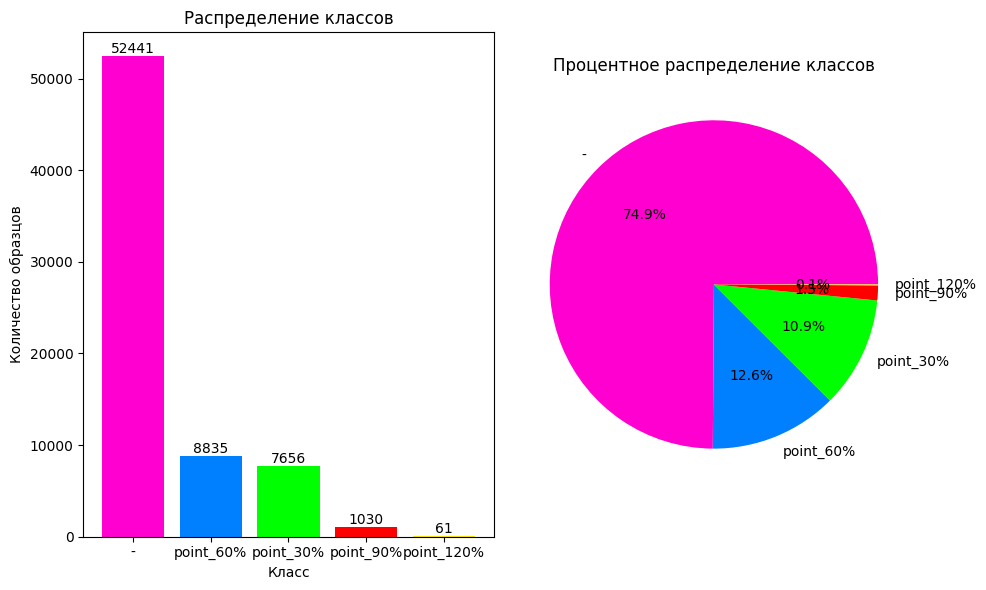

Статистика по классам:
Класс -: 52441 samples (74.9%)
Класс point_60%: 8835 samples (12.6%)
Класс point_30%: 7656 samples (10.9%)
Класс point_90%: 1030 samples (1.5%)
Класс point_120%: 61 samples (0.1%)
Pairplot может занять некоторое время...


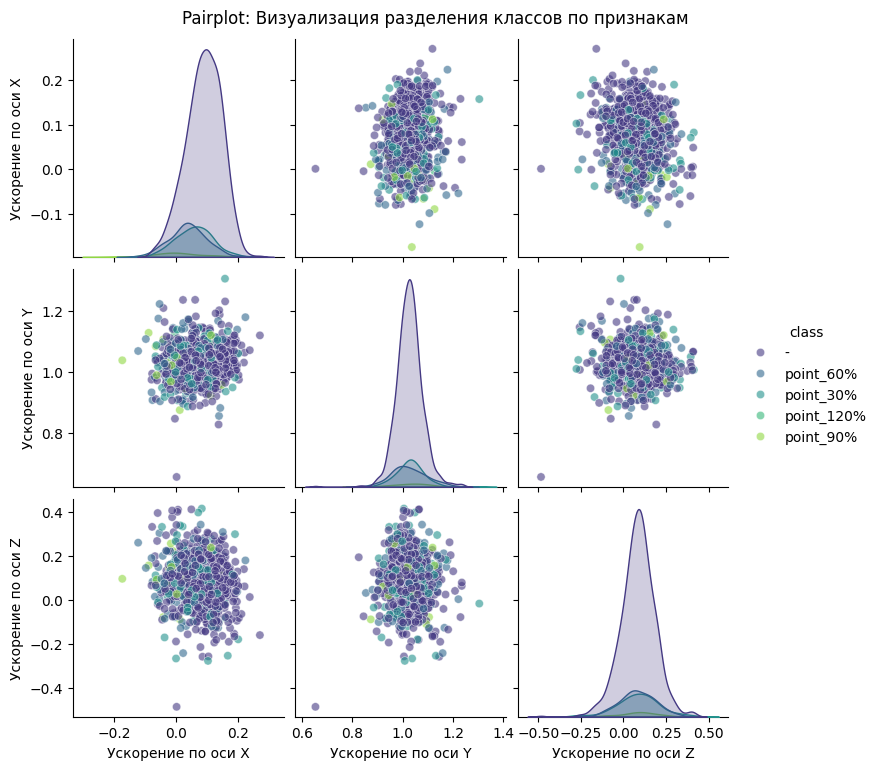

In [35]:
plot_class_distribution(y)
plot_pairplot(X, y)

In [22]:
compare_models(X, y)

Random Forest: 0.7394
Gradient Boosting: 0.7545
Logistic Regression: 0.7539
Balanced Random Forest: 0.4736
Easy Ensemble: 0.5046


{'Random Forest': 0.7393787932881114,
 'Gradient Boosting': 0.7545162441985005,
 'Logistic Regression': 0.7538736165655123,
 'Balanced Random Forest': 0.473616565512317,
 'Easy Ensemble': 0.5046054980364155}

In [38]:
train_best_model(X,y)


=== ОБУЧЕНИЕ МОДЕЛИ ===
Точность на тренировочных данных: 0.7526
Точность на тестовых данных: 0.7477
Кросс-валидация (5-fold): 0.7478 ± 0.0003

=== ДЕТАЛЬНЫЙ ОТЧЕТ ===
              precision    recall  f1-score   support

           -       0.75      1.00      0.86     10489
  point_120%       0.00      0.00      0.00        12
   point_30%       0.21      0.00      0.01      1531
   point_60%       0.29      0.01      0.01      1767
   point_90%       0.00      0.00      0.00       206

    accuracy                           0.75     14005
   macro avg       0.25      0.20      0.17     14005
weighted avg       0.62      0.75      0.64     14005

=== ВАЖНОСТЬ ПРИЗНАКОВ ===
              feature  importance
0  Ускорение по оси X    0.772273
1  Ускорение по оси Y    0.134120
2  Ускорение по оси Z    0.093607


GradientBoostingClassifier(random_state=42)